# I plotted the distribution of other university data against Duquesne data and compared the distribution. The key difference between good college and Duquense is the income of students after graduating from the universities. 

In [24]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import glob
import openpyxl 

In [43]:
data00 =pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")
data1 =pd.read_csv("MERGED2018_19_PP.csv")
c = pd.concat([data00,data1],ignore_index=True)
c.head

/Users/anshu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,9,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1379,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1412,1413,1427,1428,1431,1432,1503,1517,1532,1533,1534,1535,1536,1537,1538,1539,1540,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1567,1568,1573,1574,1575,1576,1577,1581,1582,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1604,1605,1606,1608,1610,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1636,1638,1640,1643,1644,1648,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1664,1666,1669,1670,1674,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1695,1697,1700,1701,1702,1703,1704,1705,1706,1707,1711,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830

<bound method NDFrame.head of          UNITID    OPEID  OPEID6                                    INSTNM  \
0        100654   100200    1002                  Alabama A & M University   
1        100663   105200    1052       University of Alabama at Birmingham   
2        100690  2503400   25034                        Amridge University   
3        100706   105500    1055       University of Alabama in Huntsville   
4        100724   100500    1005                  Alabama State University   
...         ...      ...     ...                                       ...   
13496  48511112   157114    1571         Georgia Military College - Dublin   
13497  48511113   157115    1571        Georgia Military College - Eastman   
13498  48616901  4204801   42048  American College of Barbering - Florence   
13499  49005401  4182601   41826      HCI College - Fort Lauderdale Campus   
13500  49146401  4227001   42270          ABC Adult School - Cabrillo Lane   

                  CITY STABBR    

In [26]:
d[d['INSTNM'].str.contains('Duq')]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10,U_Flag
2813,212106,325800,3258,Duquesne University,Pittsburgh,PA,15282,Middle States Commission on Higher Education,www.duq.edu/,www.duq.edu/admissions-and-aid/tuition/net-pri...,...,62826.0,0.8655,55439.0,63385.0,73210.0,55501.0,67060.0,63914.0,69627.0,DUQ
9568,212106,325800,3258,Duquesne University,Pittsburgh,PA,15282,NaN,NaN,NaN,...,62826.0,0.8655,55439.0,63385.0,73210.0,55501.0,67060.0,63914.0,69627.0,DUQ


/var/folders/pc/b79gw3f952zb_st02l28z7040000gn/T/ipykernel_96077/507292309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['U_Flag'] = np.where(d['INSTNM'].str.contains('Duq'), "DUQ", "All_other")


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10,U_Flag
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0,All_other
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,...,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0,All_other
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0,All_other
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0,All_other
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0,All_other


In [28]:
c[c['INSTNM'].str.contains('Duq')]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
2813,212106,325800,3258,Duquesne University,Pittsburgh,PA,15282,Middle States Commission on Higher Education,www.duq.edu/,www.duq.edu/admissions-and-aid/tuition/net-pri...,...,831.0,62826.0,0.8655,55439.0,63385.0,73210.0,55501.0,67060.0,63914.0,69627.0
9568,212106,325800,3258,Duquesne University,Pittsburgh,PA,15282,NaN,NaN,NaN,...,831.0,62826.0,0.8655,55439.0,63385.0,73210.0,55501.0,67060.0,63914.0,69627.0


In [29]:
d = c.dropna(axis=1, how='all')
d

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,834.0,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,...,1233.0,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,78.0,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,891.0,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1077.0,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,NaN,NaN,NaN,...,1408.0,36215.0,0.5639,32723.0,37533.0,39565.0,35440.0,34142.0,30836.0,40550.0
13497,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,NaN,NaN,NaN,...,1408.0,36215.0,0.5639,32723.0,37533.0,39565.0,35440.0,34142.0,30836.0,40550.0
13498,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13499,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for col in d.columns:
    print(col)

UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
SCH_DEG
HCM2
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
WOMENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATWR25
SATWR75
SATVRMID
SATMTMID
SATWRMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTWR25
ACTWR75
ACTCMMID
ACTENMID
ACTMTMID
ACTWRMID
SAT_AVG
SAT_AVG_ALL
PCIP01
PCIP03
PCIP04
PCIP05
PCIP09
PCIP10
PCIP11
PCIP12
PCIP13
PCIP14
PCIP15
PCIP16
PCIP19
PCIP22
PCIP23
PCIP24
PCIP25
PCIP26
PCIP27
PCIP29
PCIP30
PCIP31
PCIP38
PCIP39
PCIP40
PCIP41
PCIP42
PCIP43
PCIP44
PCIP45
PCIP46
PCIP47
PCIP48
PCIP49
PCIP50
PCIP51
PCIP52
PCIP54
CIP01CERT1
CIP01CERT2
CIP01ASSOC
CIP01CERT4
CIP01BACHL
CIP03CERT1
CIP03CERT2
CIP03ASSOC
CIP03CERT4
CIP03BACHL
CIP04CERT1
CIP04CERT2
CIP04ASSOC
CIP04CERT4
CIP04BACHL
CIP05CERT1
CIP05CERT2
CIP05ASSOC
CIP05CERT4
CIP05BACHL
CIP09CERT1
CIP09CERT2
CIP09ASSOC
CIP09CE

BBRR1_FED_GRNOCOMP_NOPROG
BBRR1_FED_GRNOCOMP_MAKEPROG
BBRR1_FED_GRNOCOMP_PAIDINFULL
BBRR1_FED_GRNOCOMP_DISCHARGE
BBRR1_PP_UG_N
BBRR1_PP_UG_DFLT
BBRR1_PP_UG_DLNQ
BBRR1_PP_UG_FBR
BBRR1_PP_UG_DFR
BBRR1_PP_UG_NOPROG
BBRR1_PP_UG_MAKEPROG
BBRR1_PP_UG_PAIDINFULL
BBRR1_PP_UG_DISCHARGE
BBRR1_PP_UGCOMP_N
BBRR1_PP_UGCOMP_DFLT
BBRR1_PP_UGCOMP_DLNQ
BBRR1_PP_UGCOMP_FBR
BBRR1_PP_UGCOMP_DFR
BBRR1_PP_UGCOMP_NOPROG
BBRR1_PP_UGCOMP_MAKEPROG
BBRR1_PP_UGCOMP_PAIDINFULL
BBRR1_PP_UGCOMP_DISCHARGE
BBRR1_PP_UGNOCOMP_N
BBRR1_PP_UGNOCOMP_DFLT
BBRR1_PP_UGNOCOMP_DLNQ
BBRR1_PP_UGNOCOMP_FBR
BBRR1_PP_UGNOCOMP_DFR
BBRR1_PP_UGNOCOMP_NOPROG
BBRR1_PP_UGNOCOMP_MAKEPROG
BBRR1_PP_UGNOCOMP_PAIDINFULL
BBRR1_PP_UGNOCOMP_DISCHARGE
BBRR1_PP_UGUNK_N
BBRR1_PP_UGUNK_DFLT
BBRR1_PP_UGUNK_DLNQ
BBRR1_PP_UGUNK_FBR
BBRR1_PP_UGUNK_DFR
BBRR1_PP_UGUNK_NOPROG
BBRR1_PP_UGUNK_MAKEPROG
BBRR1_PP_UGUNK_PAIDINFULL
BBRR1_PP_UGUNK_DISCHARGE
BBRR2_FED_UG_N
BBRR2_FED_UG_DFLT
BBRR2_FED_UG_DLNQ
BBRR2_FED_UG_FBR
BBRR2_FED_UG_DFR
BBRR2_FED_UG_NOPROG
BBRR2

In [31]:
d['U_Flag'] = np.where(d['INSTNM'].str.contains('Duq'), "DUQ", "All_other")
d.head()

/var/folders/pc/b79gw3f952zb_st02l28z7040000gn/T/ipykernel_96077/507292309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['U_Flag'] = np.where(d['INSTNM'].str.contains('Duq'), "DUQ", "All_other")


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10,U_Flag
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0,All_other
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,...,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0,All_other
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0,All_other
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0,All_other
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0,All_other


# Percentage of degrees awarded in Business, Management, Marketing, And Related Support Services.

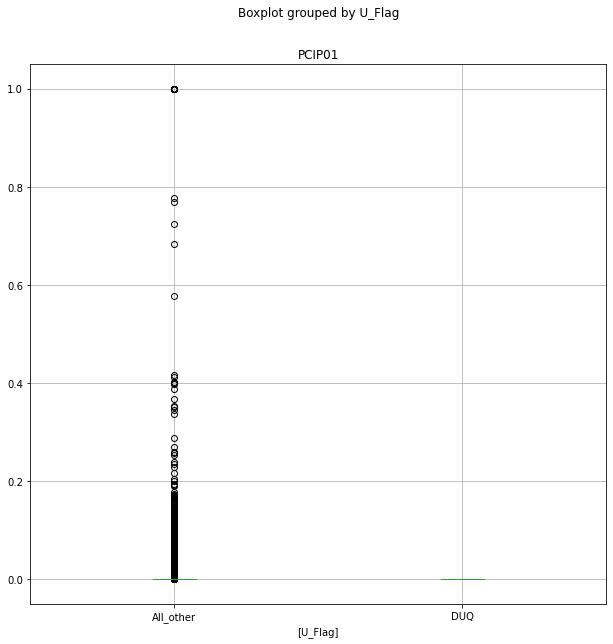

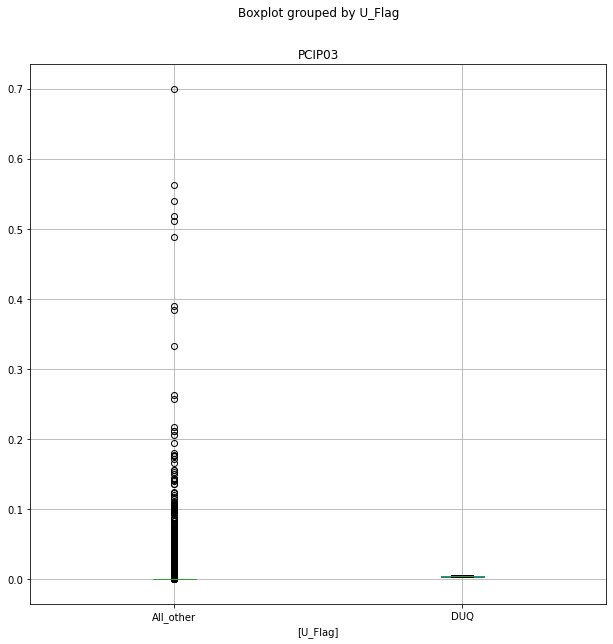

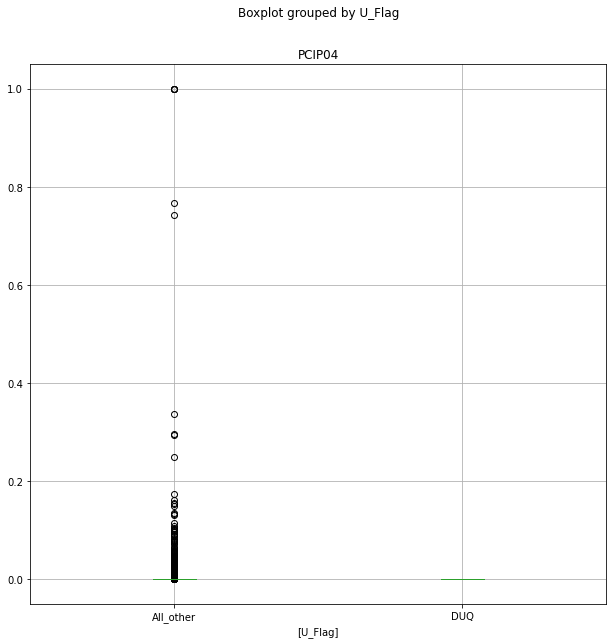

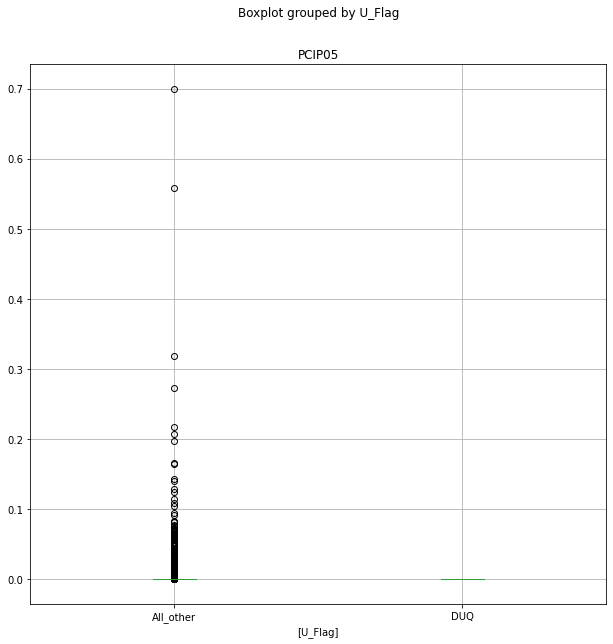

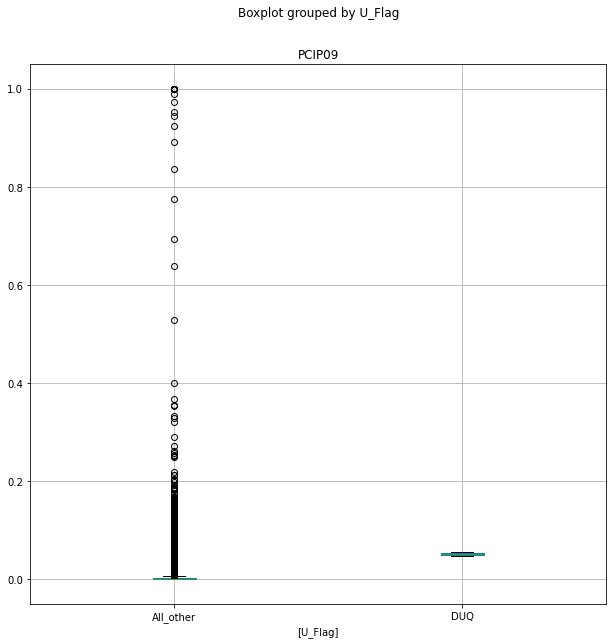

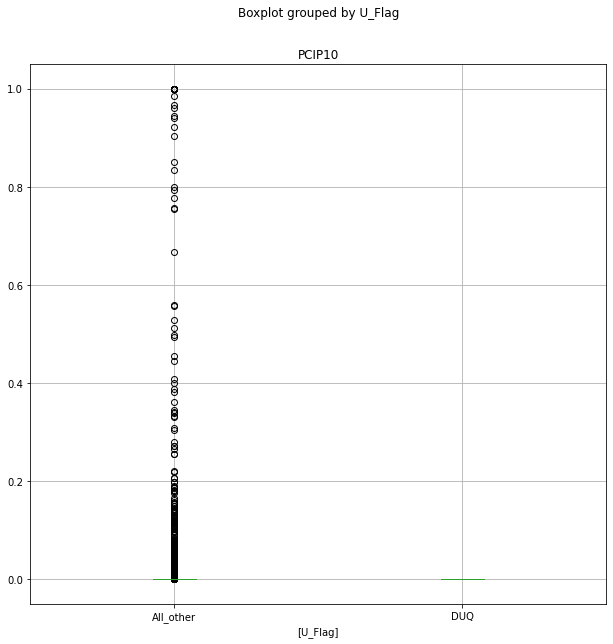

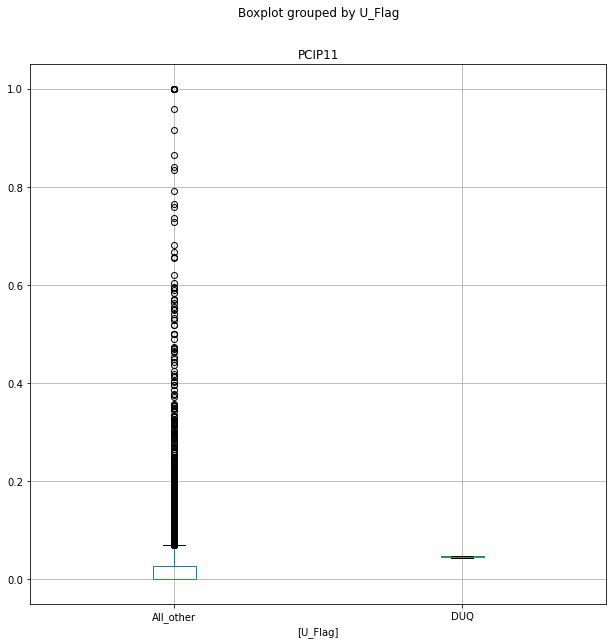

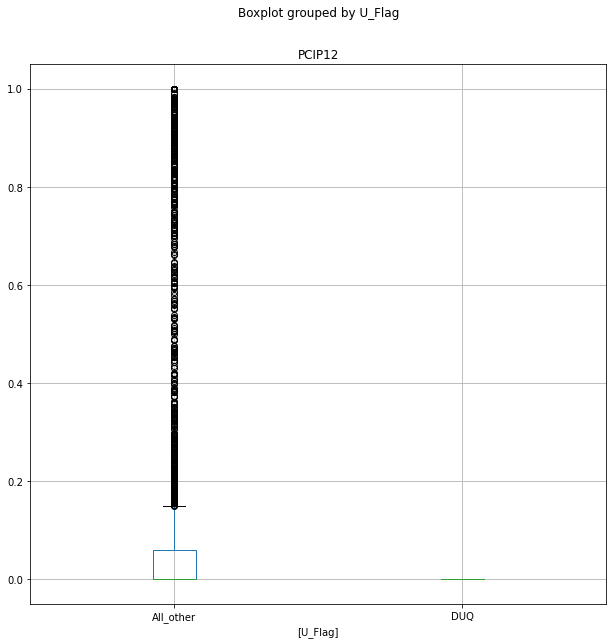

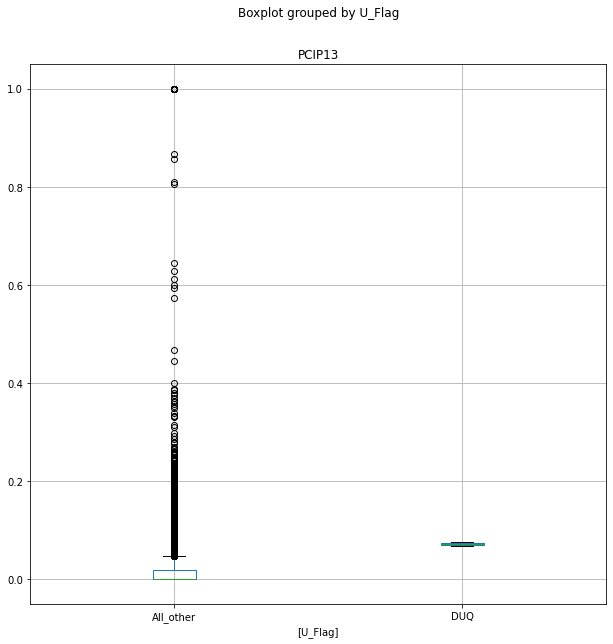

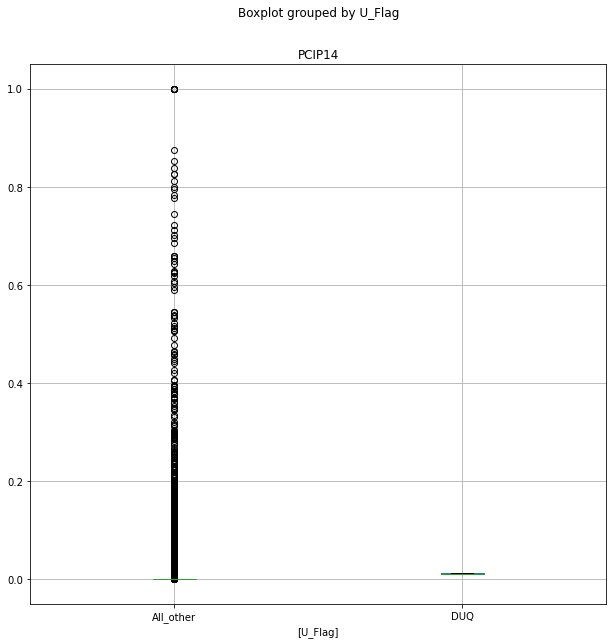

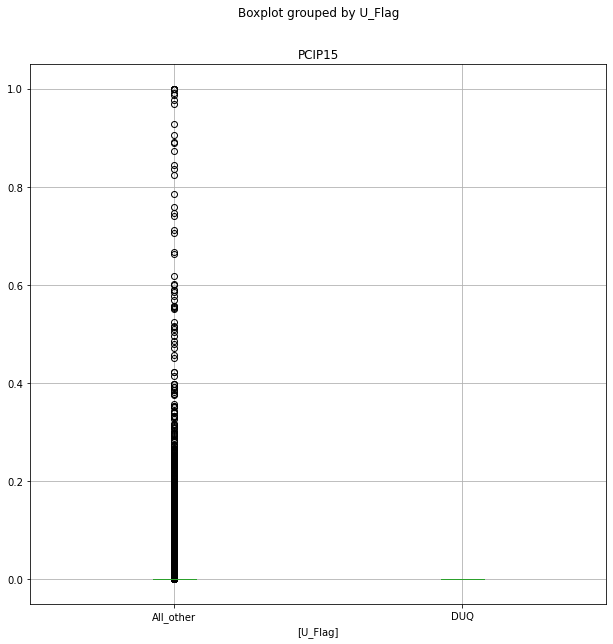

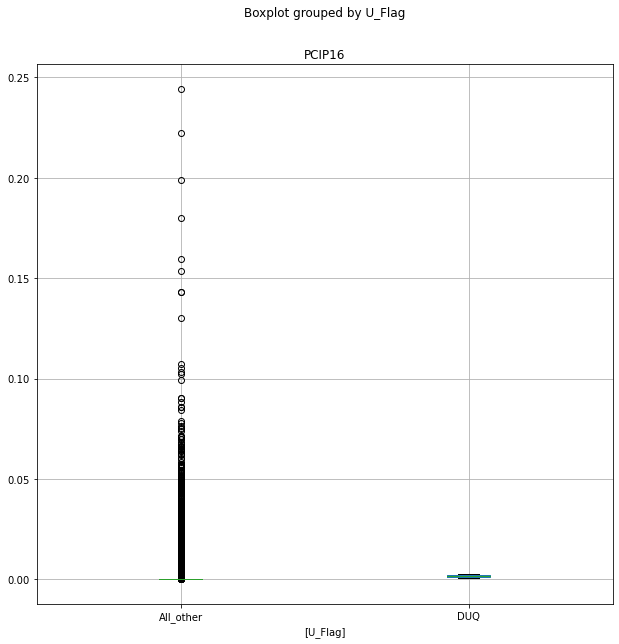

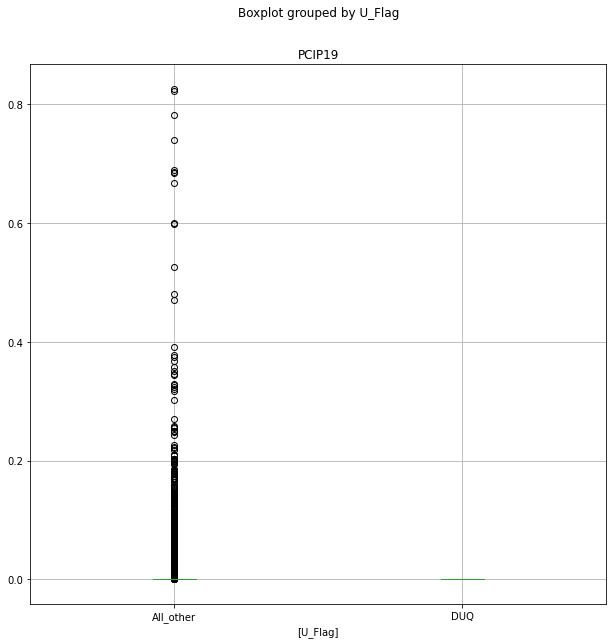

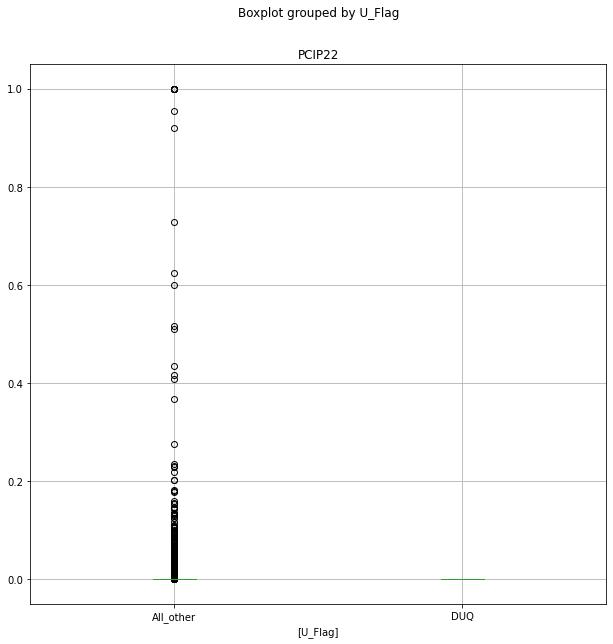

In [35]:
variable_list = ["PCIP01","PCIP03","PCIP04" ,"PCIP05","PCIP09","PCIP10","PCIP11",
                 "PCIP12","PCIP13","PCIP14","PCIP15", "PCIP16","PCIP19","PCIP22"]

for i in variable_list:
    boxplot = d.boxplot(column=[i], by = ['U_Flag'],figsize = (10, 10)) 

# Certificate, Associate degree, Bachelor's degree, Award in Computer And Information Sciences And Support Services.

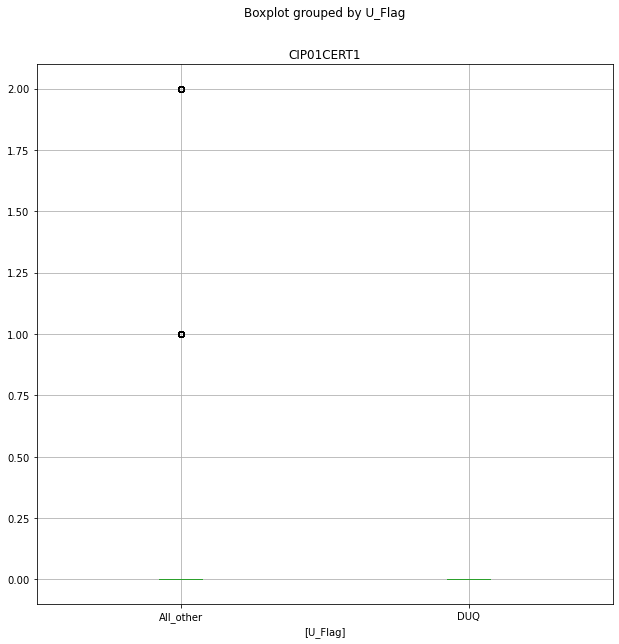

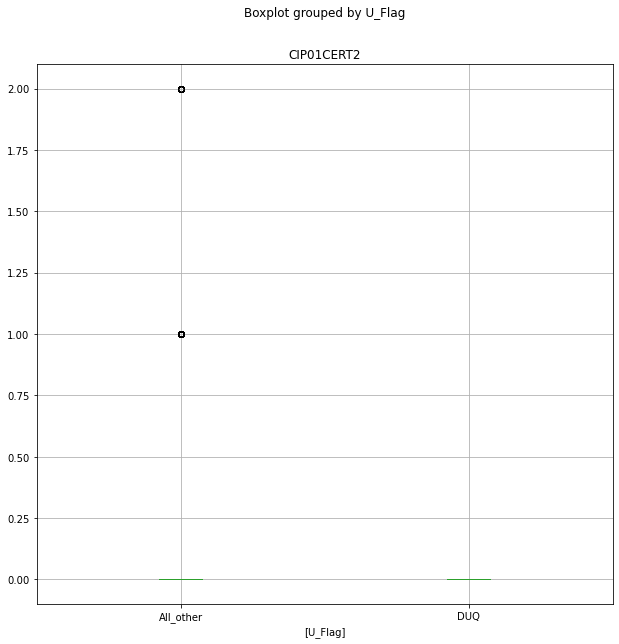

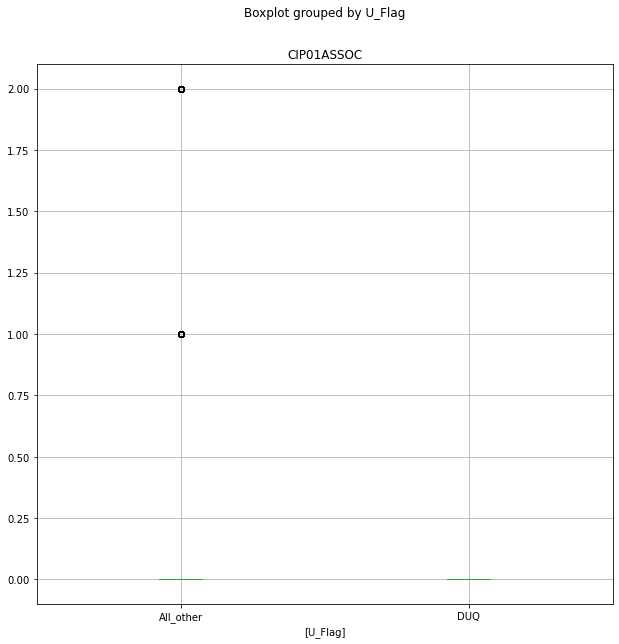

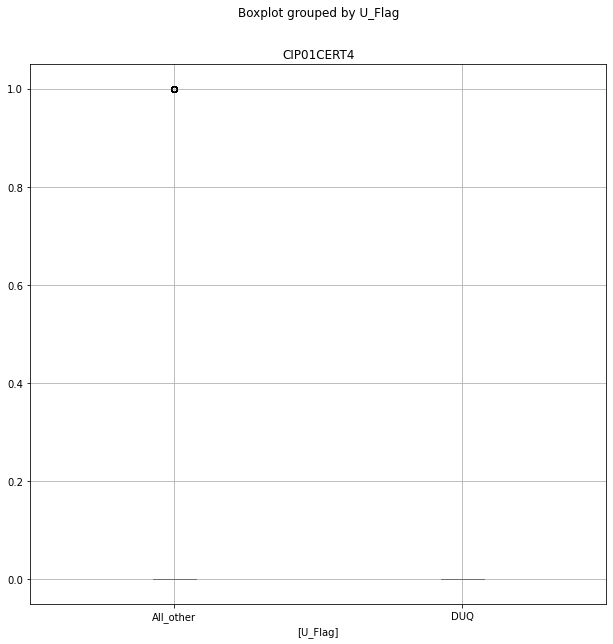

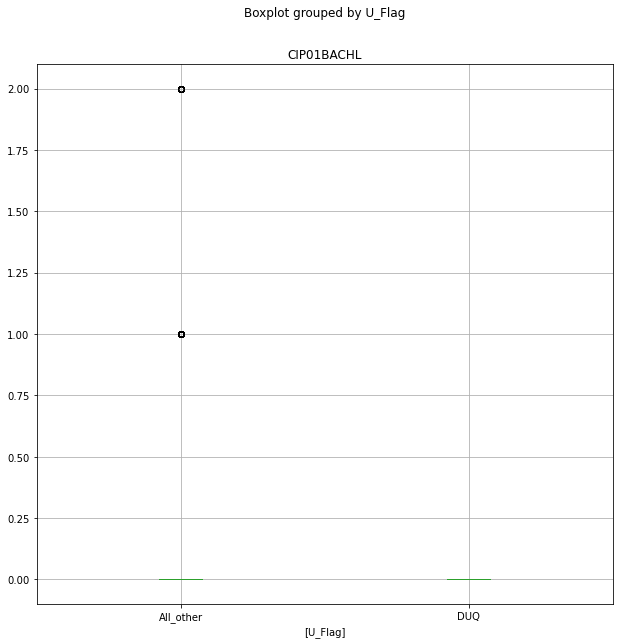

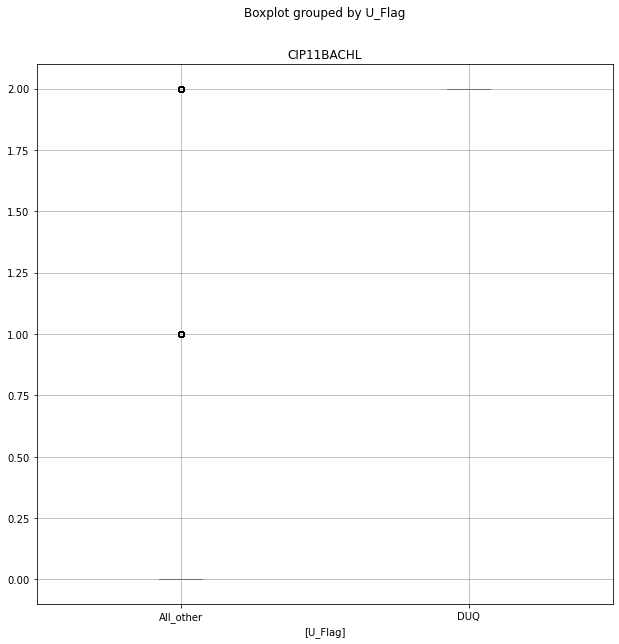

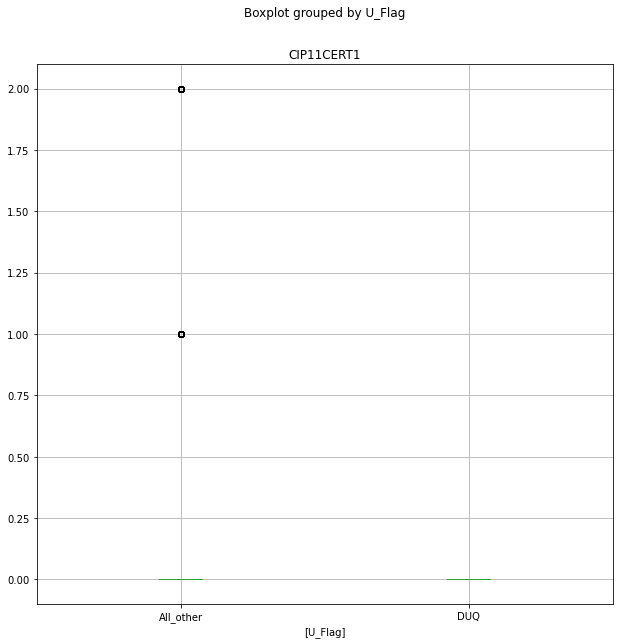

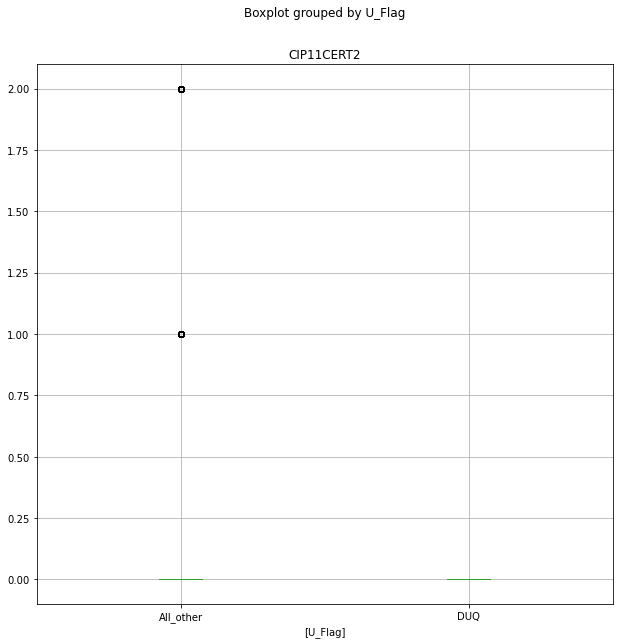

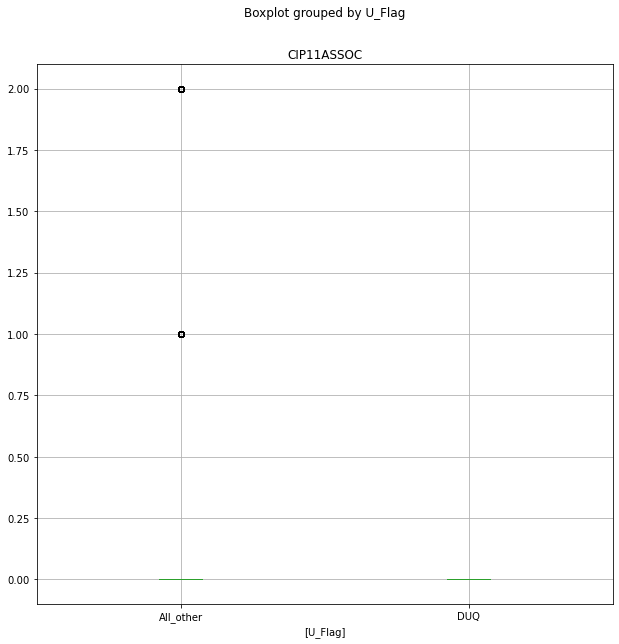

In [39]:
variable_list = ["CIP01CERT1",
"CIP01CERT2","CIP01ASSOC" ,"CIP01CERT4","CIP01BACHL","CIP11BACHL","CIP11CERT1","CIP11CERT2","CIP11ASSOC"]
for i in variable_list:
    boxplot = d.boxplot(column=[i], by = ['U_Flag'],figsize = (10, 10)) 

# Enrollment of undergraduate certificate/degree-seeking students and their share WHITE,BLACK,HISP,ASIAN,AIAN

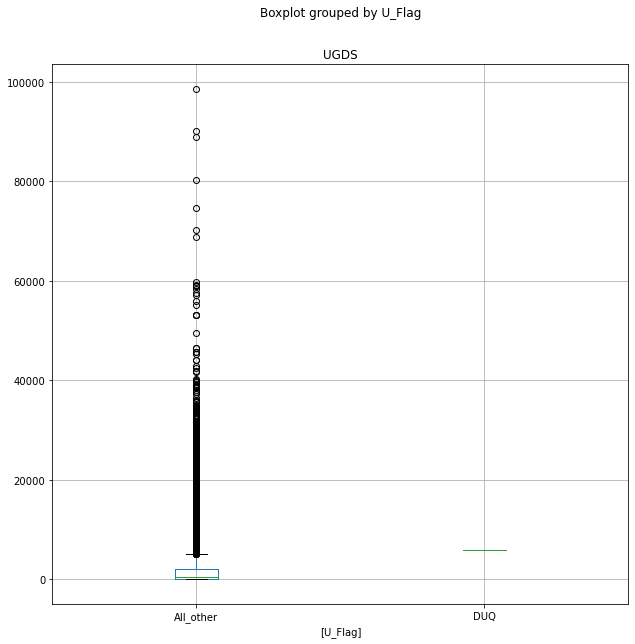

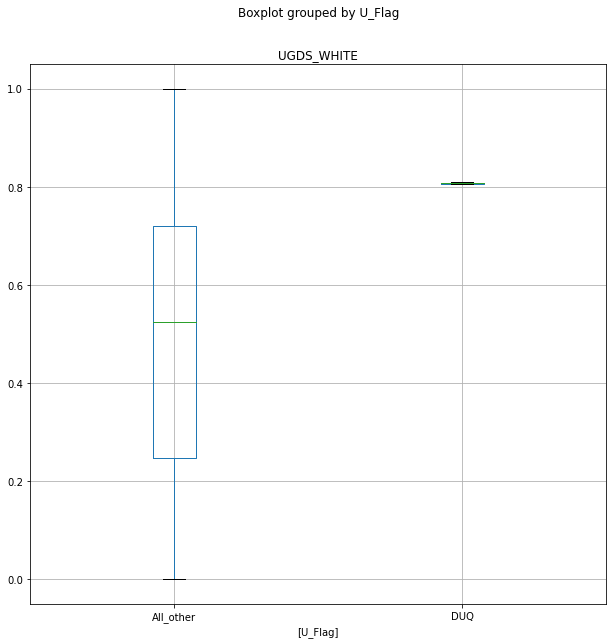

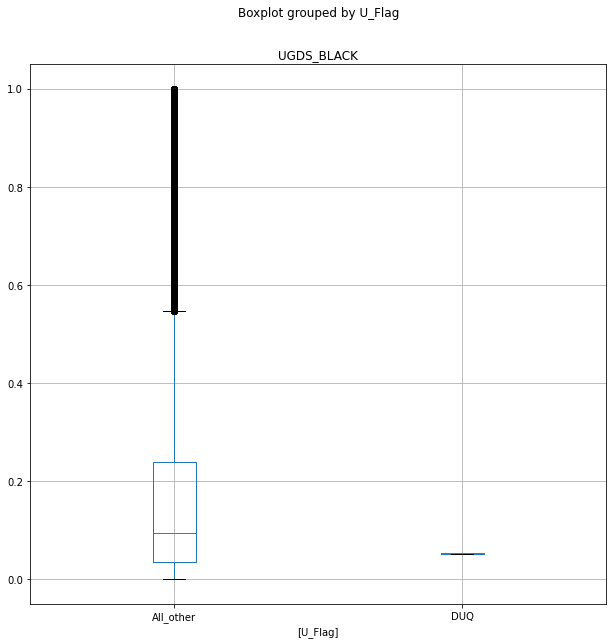

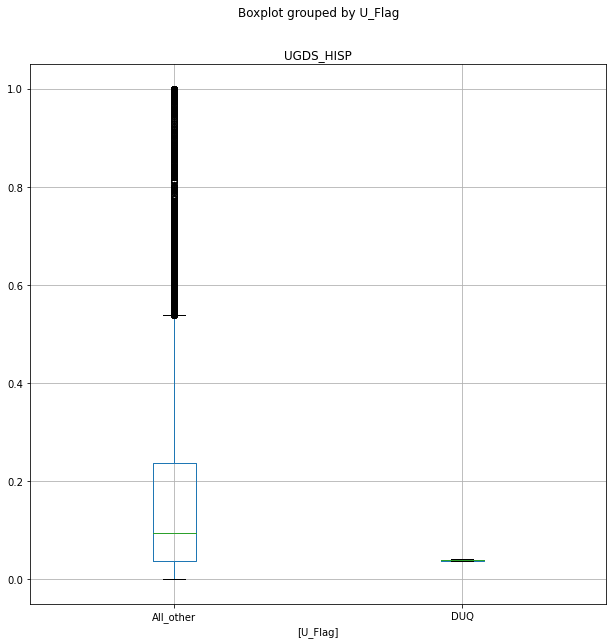

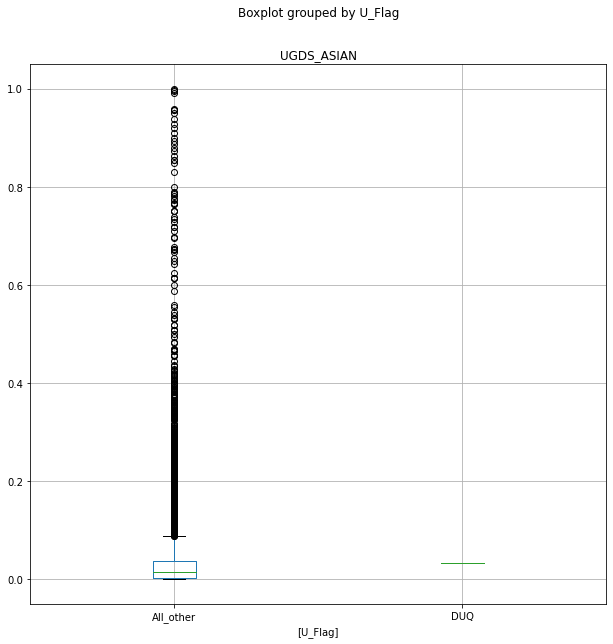

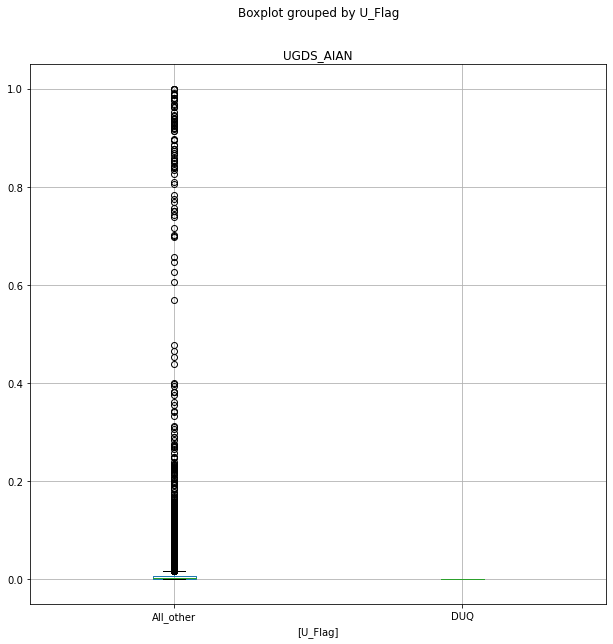

In [40]:
variable_list = ["UGDS",
"UGDS_WHITE","UGDS_BLACK" ,"UGDS_HISP","UGDS_ASIAN","UGDS_AIAN"]
for i in variable_list:
    boxplot = d.boxplot(column=[i], by = ['U_Flag'],figsize = (10, 10)) 

# Average net price for Title IV institutions (public institutions),(private for-profit and nonprofit institutions)

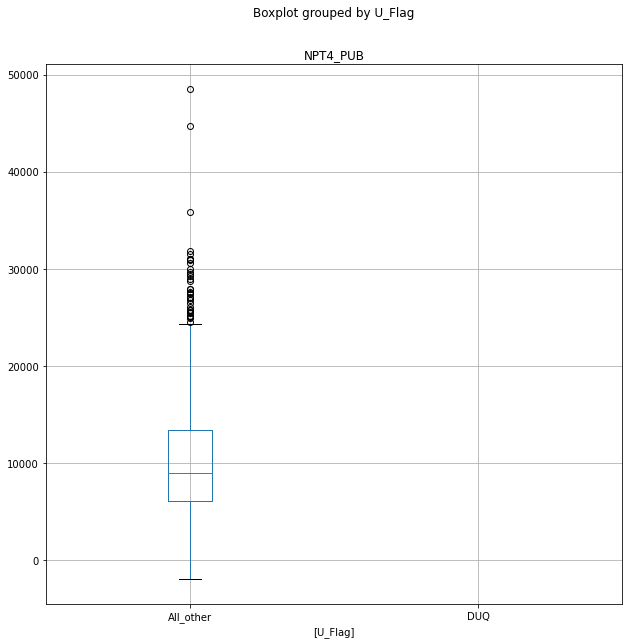

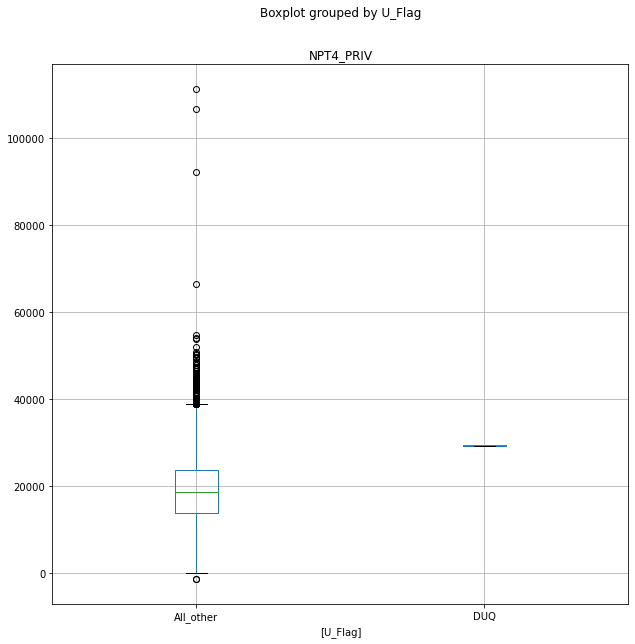

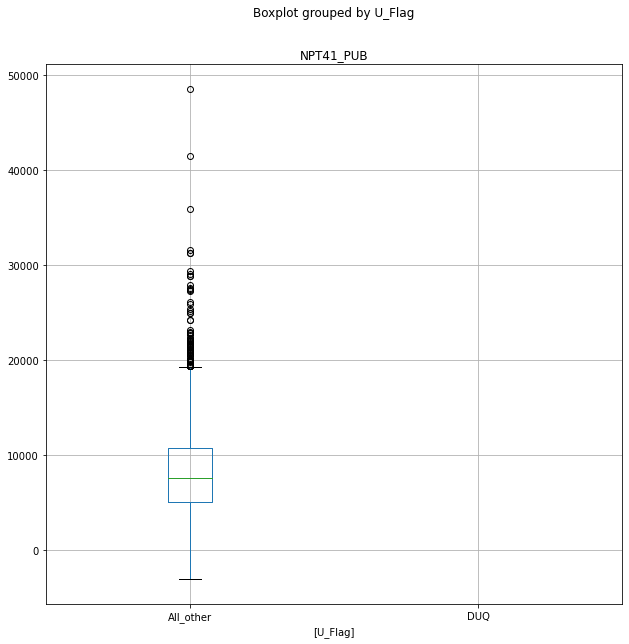

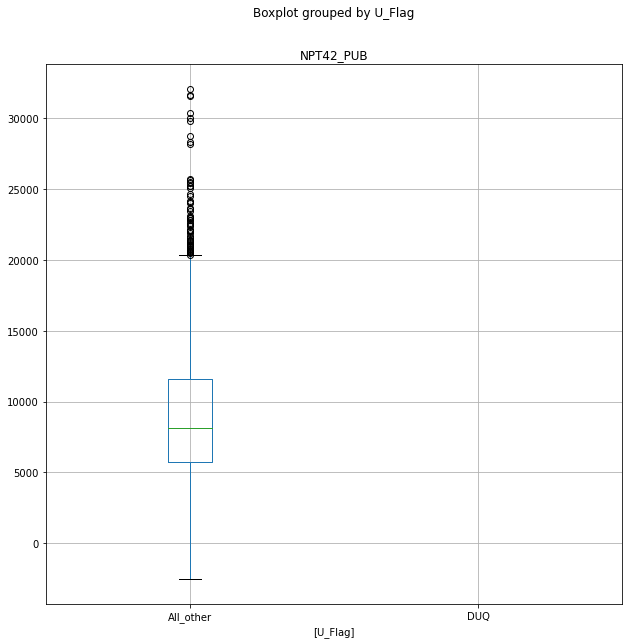

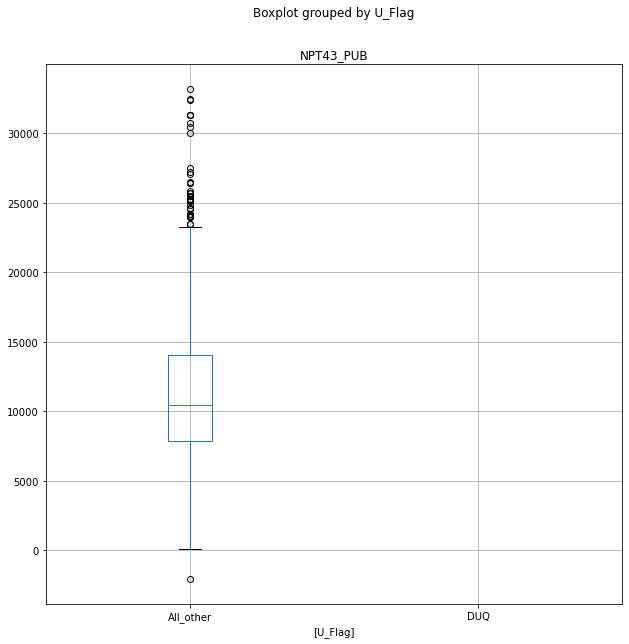

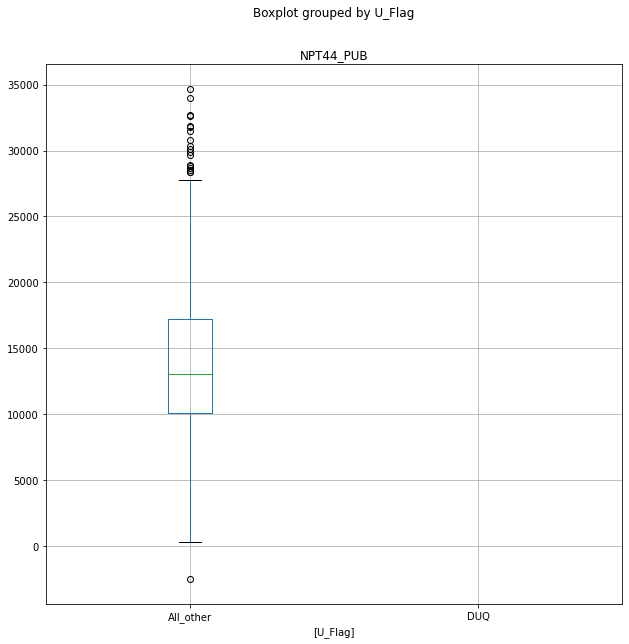

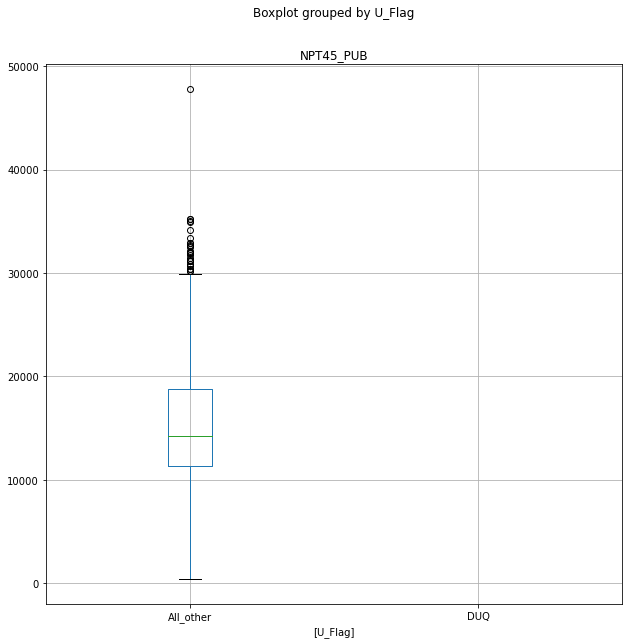

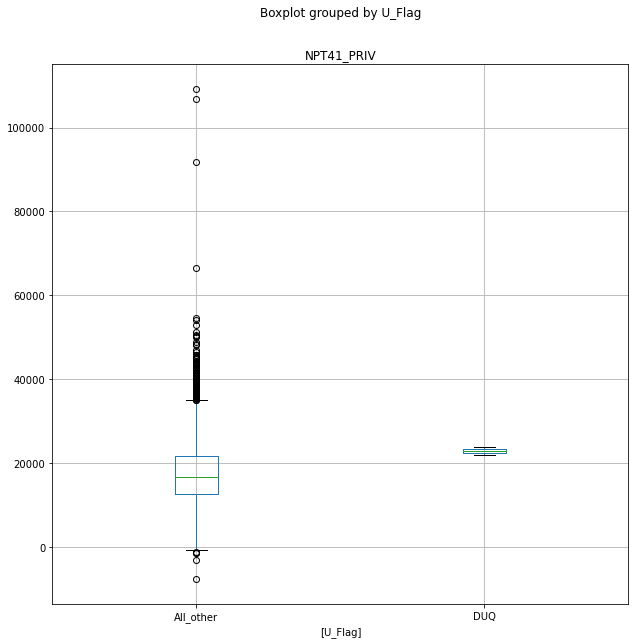

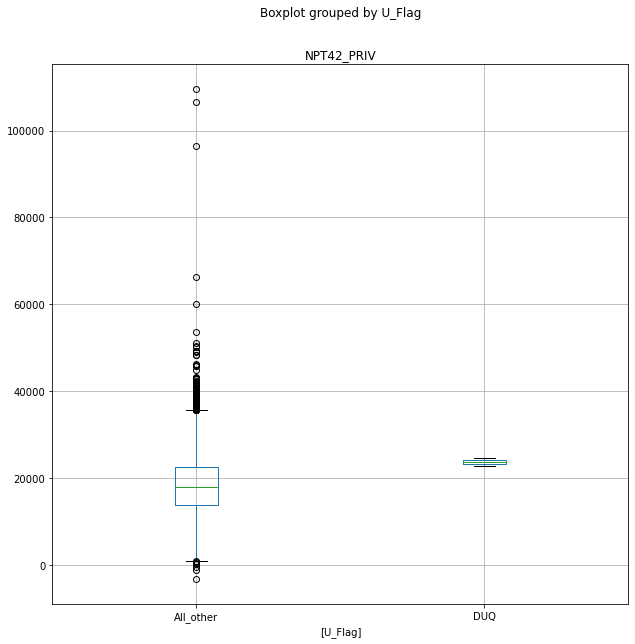

In [42]:
variable_list = ["NPT4_PUB",
"NPT4_PRIV","NPT41_PUB" ,"NPT42_PUB","NPT43_PUB","NPT44_PUB","NPT45_PUB","NPT41_PRIV","NPT42_PRIV"]
for i in variable_list:
    boxplot = d.boxplot(column=[i], by = ['U_Flag'],figsize = (10, 10)) 

# Average cost of attendance (academic year institutions),Average cost of attendance (program-year institutions),In-state tuition and fees,Tuition and fees for program-year institutions,Net tuition revenue per full-time equivalent student, Instructional expenditures per full-time equivalent student

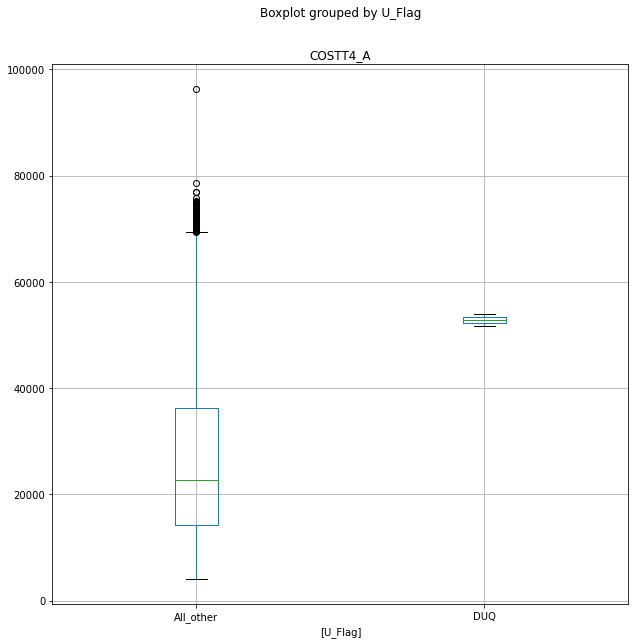

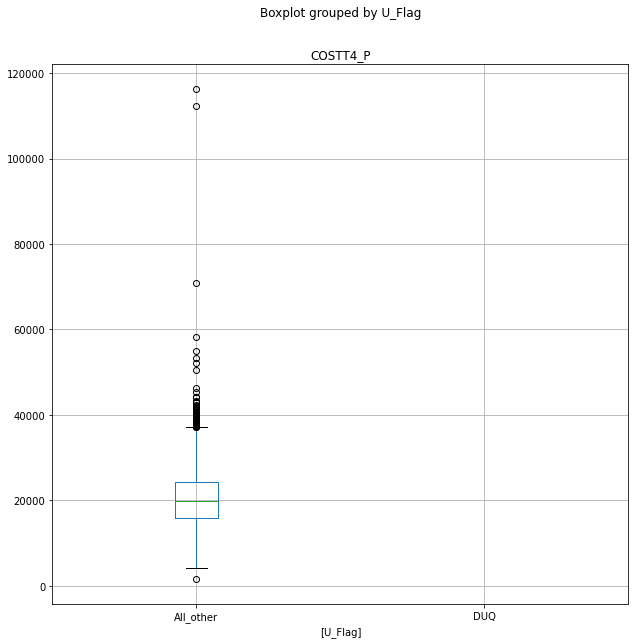

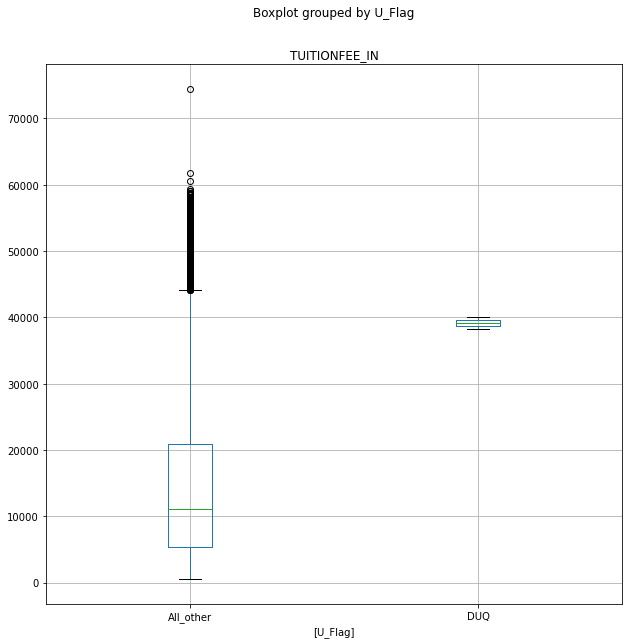

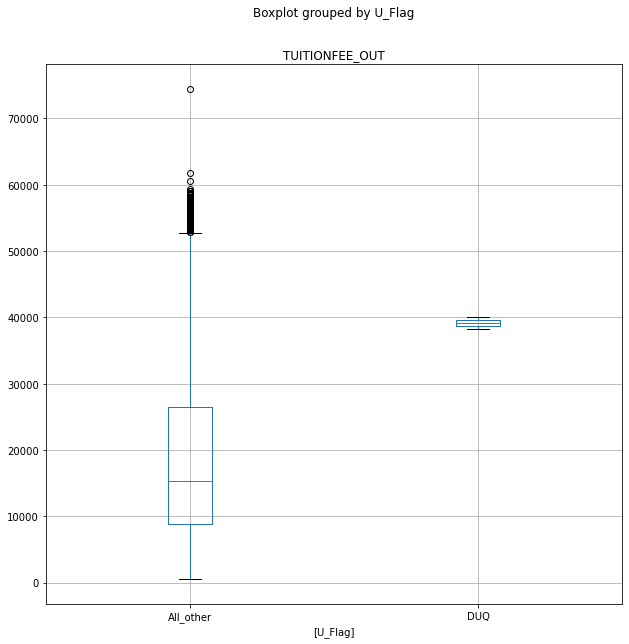

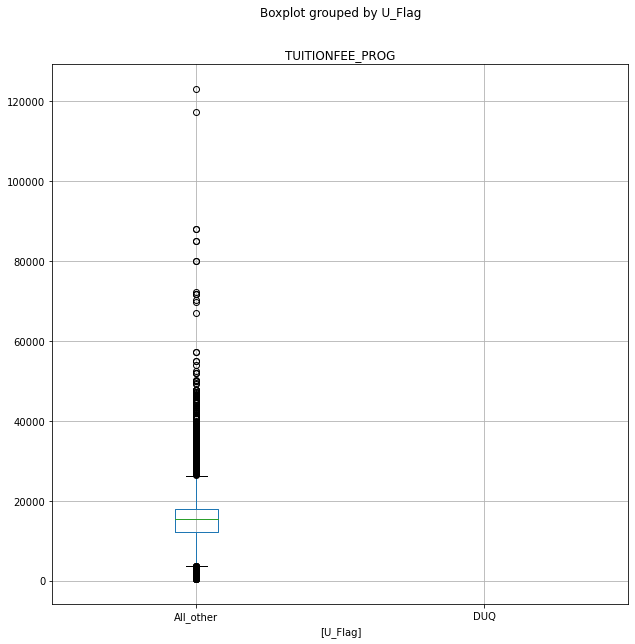

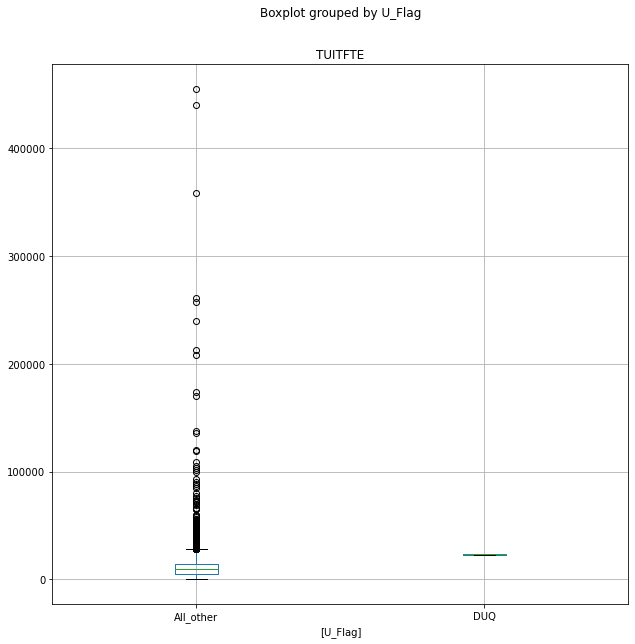

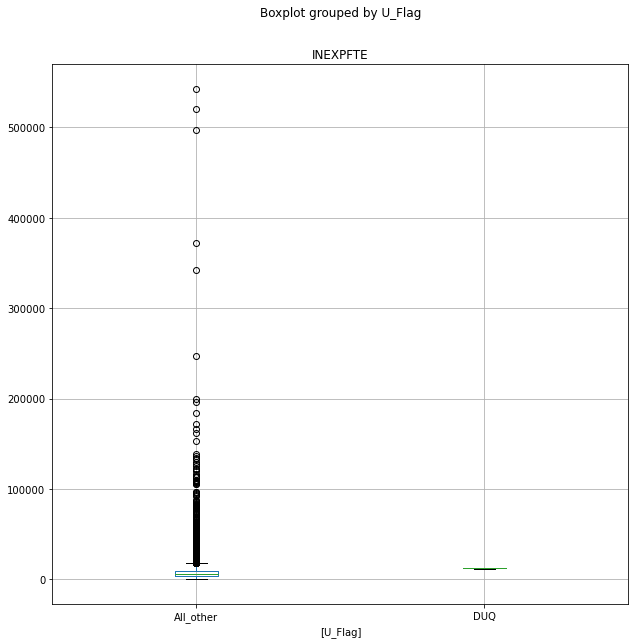

In [44]:
variable_list = ["COSTT4_A",
"COSTT4_P","TUITIONFEE_IN" ,"TUITIONFEE_OUT","TUITIONFEE_PROG","TUITFTE","INEXPFTE"]
for i in variable_list:
    boxplot = d.boxplot(column=[i], by = ['U_Flag'],figsize = (10, 10)) 

# Average faculty salary

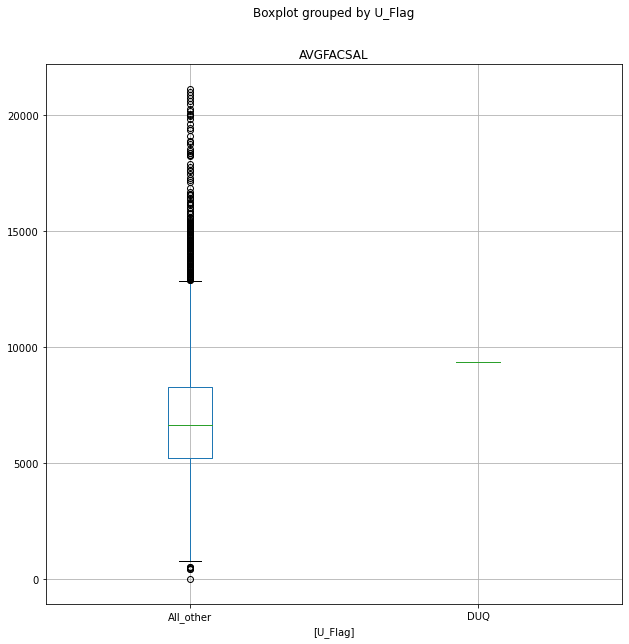

In [45]:
boxplot = d.boxplot(column=['AVGFACSAL'], by = ['U_Flag'],figsize = (10, 10))  